In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from scipy.stats import *

In [9]:
rv=gamma(1.0)
x = np.linspace(0, 10, 10000)
plt.plot(x, rv.pdf(x) ,'r-', lw=5, alpha=0.6, label='gamma pdf')

AttributeError: 'numpy.float64' object has no attribute 'pdf'

/Users/zukako/.pyenv/versions/anaconda3-4.0.0/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


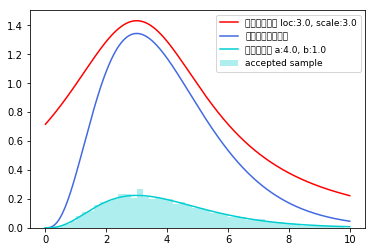

In [7]:
from scipy.stats import *
from scipy.special import *

# ガンマ分布のパラメータ
a = 4.0
b = 1.0

# ガンマ分布
gamma_pdf = lambda z: (b**a * z**(a-1) * np.exp(-b*z)) / (gamma(a))

# ガンマ分布チルダ（ガンマ分布の正規化項無いバージョン）
gamma_tilde_pdf = lambda z: z**(a - 1) * np.exp(-b*z)

# コーシー分布のパラメータ
loc = 3.0
scale = 3.0
k = 13.5

N = 10000
# コーシー分布からサンプリング
z = cauchy.rvs(loc=loc, scale=scale, size=N)

# 区間[0, kq(z)]の一様分布からuをサンプリング
u = np.array([np.random.uniform(0, k * cauchy.pdf(zi, loc=loc, scale=scale)) for zi in z])

# u > ~p(zi)となるサンプルを調べる
reject_indexs = np.where(u - gamma_tilde_pdf(z) > 0)[0]
# 条件を満たしたものは棄却されるので、削除
z_accepted = np.delete(z, reject_indexs)

# acceptされたサンプルのヒストグラム描画
plt.hist(z_accepted, bins=50, range=(0, 10), color='paleturquoise', label='accepted sample', normed=1)

# 各分布の描画
x = np.linspace(0, 10, 10000)
plt.plot(x, cauchy.pdf(x, loc=loc, scale=scale)*k, c='r', label='コーシー分布 loc:{}, scale:{:}'.format(loc, scale))
plt.plot(x, gamma_tilde_pdf(x), c='royalblue', label='ガンマ分布チルダ')
plt.plot(x, gamma_pdf(x), 'darkturquoise', label='ガンマ分布 a:{}, b:{}'.format(a, b))

plt.legend(loc='best', prop={'size': 9})

In [11]:
gamma_pdf(1)

0.061313240195240391

In [50]:
# 正規分布の足し合わせ
k1,k2,mu1,mu2,sigma1,sigma2=0.5,1,1,5,1,1
k,mu,sigma=2,5,5
norm_tilde_pdf = lambda z: k1*np.exp((-(z-mu1)**2)/(2*sigma1**2))+k2*np.exp((-(z-mu2)**2)/(2*sigma2**2))
norm_pdf = lambda z: np.exp((-(z-mu)**2)/(2*sigma**2))

z = np.array([np.random.normal(mu,sigma) for i in range(10000)])

u = np.array([np.random.uniform(0, k*norm_pdf(zi)) for zi in z])
reject_indexs = np.where(u - norm_tilde_pdf(z) > 0)[0]
# 条件を満たしたものは棄却されるので、削除
z_accepted = np.delete(z, reject_indexs)

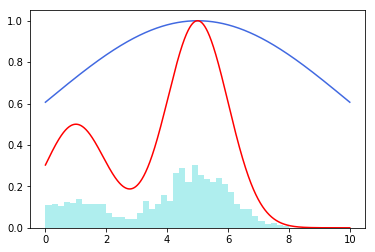

In [52]:
x = np.linspace(0, 10, 10000)
plt.plot(x, norm_pdf(x), c='royalblue', label='ガンマ分布チルダ')
plt.plot(x, norm_tilde_pdf(x), c='red', label='ガンマ分布チルダ')
plt.hist(z_accepted, bins=50, range=(0, 10), color='paleturquoise', label='accepted sample', normed=1)
plt.show()

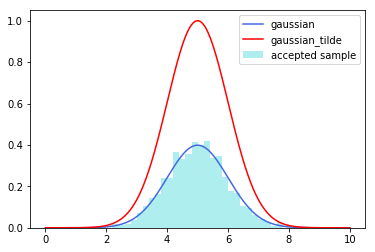

In [54]:
import math
sigma = 1
mu = 5

# 正規化あり
gauss_pdf = lambda z: (1/math.sqrt(2*np.pi*(sigma**2)))*np.exp((-(z-mu)**2)/(2*sigma**2)) 
# 正規化なし
gauss_tilde_pdf = lambda z: np.exp((-(z-mu)**2)/(2*sigma**2)) 
# サンプリングのためのx座標群を決める。
z = np.array([np.random.uniform(0,10) for i in range(10000)] )
# uのサンプリング
u = np.array([np.random.uniform(0,1) for zi in z])
reject_indexs = np.where(u - gauss_tilde_pdf(z) > 0)[0]
z_accepted = np.delete(z, reject_indexs)

x = np.linspace(0, 10, 10000)
plt.plot(x, gauss_pdf(x), c='royalblue', label='gaussian')
plt.plot(x, gauss_tilde_pdf(x), c='red', label='gaussian_tilde')
# plt.plot(x,1,c='green')
#normed=1で合計を1にしている サンプル数で割っただけ。
plt.hist(z_accepted, bins=50, range=(0, 10), color='paleturquoise', label='accepted sample', normed=1) 

plt.legend()
plt.show()

In [1]:
print('isabella')

isabella


In [2]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9
